In [2]:
import pandas as pd
import numpy as np
import tweepy
import re
import string
import nltk

In [ ]:
!pip install Sastrawi

     |████████████████████████████████| 209 kB 8.2 MB/s 


In [ ]:
api_key = "aM2VPiZE2RLfV8uQRcVQ2V0O6"
api_secret_key = "tkbNu0EaYemxr96OGYPLXpR9hEVNQNv2QK6qu3MqleFJGCryGK"
access_token = "1412618647252529156-JELI0jUP2mmKsOz3iPRa8yszgWYHIc"
access_token_secret = "H1NaJajXB2i2VVOgQdRGMLCRf0LJUldhxzoFZCQmFXGJz"

In [ ]:
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)

# Connecting API
api = tweepy.API(auth, wait_on_rate_limit=True)

## Scraping using keyword 'wfh'

In [ ]:
text_query = 'wfh'
count = 10000
lang = 'id'

tweets = tweepy.Cursor(api.search, q=text_query, lang=lang).items(count)

# Pulling information from tweets iterable
hasil_tweet = []

for tweet in tweets:
  tweet_properties = {}
  tweet_properties['Tanggal'] = tweet.created_at
  tweet_properties['Username'] = tweet.user.screen_name
  tweet_properties['Tweet'] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.text).split())

  # Remove duplicate tweet
  if tweet.retweet_count > 0:
    if tweet_properties not in hasil_tweet:
      hasil_tweet.append(tweet_properties)
  else:
    hasil_tweet.append(tweet_properties)

# Create dataframe
tweet_df = pd.DataFrame.from_dict(hasil_tweet, orient='columns')

In [ ]:
# Save to CSV
tweet_df.to_csv('tweets_wfh.csv')

In [ ]:
tweet_df.shape

(6964, 3)

In [3]:
tweet_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Technical Test Continuum/tweets_wfh.csv')

## Translate tweet

because TextBlob optimize in english

In [6]:
#tweet_df = tweet_df.reset_index()
tweet_df = tweet_df.drop('Unnamed: 0', axis=1)
tweet_df.head(10)

,Tanggal,Username,Tweet
0,2021-11-02 11:42:02,suhailisallehh,Dekat Olathee for now Isnin semua wfh untuk ki...
1,2021-11-02 11:41:57,ckerelrizal,haha ke kau ni jenis kerja lebih masa kalau WFH
2,2021-11-02 11:38:52,urhome69,Bener ri wkwkwk Akhir Desember 2019 bilang gin...
3,2021-11-02 11:36:44,yunita_aulia,Udah kelamaan wfh sampe lupa ritme jalanan Cap...
4,2021-11-02 11:35:18,ionpmp,Karena udah level 1 per besok wfh jadi 25 yg a...
5,2021-11-02 11:33:52,karirfess,Kr Baru 2 minggu wfo pengen resign selama ini ...
6,2021-11-02 11:32:33,DianaMauludina,Wfh hari ini pokonya luar biasa mantul mengura...
7,2021-11-02 11:31:50,fitrisyaam,Rebahan dikala closing adalah sesuatu yg mahal...
8,2021-11-02 11:31:13,deviicynthia,bersyukurnya masih diberlakukan wfh amp wfo di...
9,2021-11-02 11:29:24,Jareeeeek,Wach siap atuh zet berkabar mun mau gawe di ba...


In [ ]:
tweet_df = tweet_df.dropna(how='any')

In [ ]:
tweet_df.isnull().sum()

index       0
Tanggal     0
Username    0
Tweet       0
dtype: int64

### Pre-process text

Cause it's to messy

In [ ]:
a = tweet_df.loc[tweet_df['Username']=='Arsmdr___']
a

,index,Tanggal,Username,Tweet
1503,1503.0,2021-10-31 15:59:17,Arsmdr___,semakin yakin pakai layanan indihome dalam men...
1565,1565.0,2021-10-31 14:29:36,Arsmdr___,ga perlu khawatir lagi ketika wfh karena adany...
1575,1575.0,2021-10-31 14:19:33,Arsmdr___,indihome membuat kegiatan wfh semakin mudah se...


In [ ]:
tweet_df.isnull().sum()

index       300
Tanggal     300
Username    300
Tweet       300
dtype: int64

In [ ]:
# Remove unnecesary data
tweet_df = tweet_df.drop(tweet_df[tweet_df.Username == 'Arsmdr___'].index)

In [ ]:
print(stop)

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [ ]:
# Lowercasing
tweet_df['Tweet'] = [textpro(stc) for stc in tweet_df['Tweet']]

In [ ]:
# remove stopwords
def remove_stopwords(sentence):
  words = sentence.split()
  words = [x for x in words if x not in stop]
  sentence = " ".join(words)
  return sentence

In [ ]:
#tweet_df['Tweet'] = [remove_stopwords(stc) for stc in tweet_df['Tweet']]
tweet_df.head()

,index,Tanggal,Username,Tweet
0,0.0,2021-11-02 11:42:02,suhailisallehh,olathee for now isnin wfh kickstart for the we...
1,1.0,2021-11-02 11:41:57,ckerelrizal,kau jenis kerja wfh
2,2.0,2021-11-02 11:38:52,urhome69,bener ri desember 2019 bilang gini planning tu...
3,3.0,2021-11-02 11:36:44,yunita_aulia,udah wfh sampe lupa ritme jalanan capek bgt badan
4,4.0,2021-11-02 11:35:18,ionpmp,udah level 1 besok wfh 25 seminggu jadwal wfhnya


In [ ]:
tweet_df['Tweet'].to_csv('tweet_bersih_new.csv')

In [8]:
tweet = pd.read_csv('/content/drive/MyDrive/tweet_bersih_new.csv')
tweet.head()

,Unnamed: 0,Tweet
0,0,olathee for now isnin wfh kickstart for the we...
1,1,kau jenis kerja wfh
2,2,bener ri desember 2019 bilang gini planning tu...
3,3,udah wfh sampe lupa ritme jalanan capek bgt badan
4,4,udah level 1 besok wfh 25 seminggu jadwal wfhnya


In [ ]:
tweet_df.shape

(6637, 4)

In [ ]:
# translated tweet
tweet_en = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Technical Test Continuum/tweet_bersih_new_en.xlsx')
tweet_en = tweet_en.reset_index()
tweet_en = tweet_en.drop('Unnamed: 0', axis=1)
tweet_en.head()

,index,Tweet
0,0,olathee for now monday wfh kickstart for the w...
1,1,you kind of work wfh
2,2,true ri december 2019 said this planning was m...
3,3,already wfh until I forget the rhythm of the r...
4,4,Already level 1 tomorrow wfh 25 a week wfh sch...


In [ ]:
tweet_en.shape

(6637, 2)

In [ ]:
# Merging dataset

tweet_use = tweet_df.merge(tweet_en, how='left', on='index')
tweet_use = tweet_use.rename(columns={'Tweet_x':'Tweet_In', 'Tweet_y':'Tweet_En'})
tweet_use.shape

(6637, 5)

In [ ]:
tweet_use = tweet_use.dropna(how='any')
tweet_use.isnull().sum()

index       0
Tanggal     0
Username    0
Tweet_In    0
Tweet_En    0
dtype: int64

In [ ]:
tweet_use.dtypes

index       float64
Tanggal      object
Username     object
Tweet_In     object
Tweet_En     object
dtype: object

## Text Processing

In [ ]:
# Make a function for text Processing

def textpro(sentence):

  # lowecasing
  sentence = sentence.lower()

  # remove white space
  sentence = sentence.strip()

  return sentence

In [ ]:
tweet_use['Tweet_En'] = [textpro(x) for x in tweet_use['Tweet_En']]
tweet_use['Tweet_In'] = [textpro(x) for x in tweet_use['Tweet_In']]

## Sentiment Analysis

In [ ]:
!pip install textblob

In [ ]:
# Import library
from textblob import TextBlob
import time

In [ ]:
# Prepare dataset

#tweet_use = tweet_use.drop(['index'], axis=1)
tweet_use.head()

,Tanggal,Username,Tweet_In,Tweet_En
0,2021-11-02 11:42:02,suhailisallehh,dekat olathee for now isnin semua wfh untuk ki...,near olathee for now monday all wfh for kickst...
1,2021-11-02 11:41:57,ckerelrizal,haha ke kau ni jenis kerja lebih masa kalau wfh,"haha to you, this type of work takes more time..."
2,2021-11-02 11:38:52,urhome69,bener ri wkwkwk akhir desember 2019 bilang gin...,really ri wkwkwk at the end of december 2019 t...
3,2021-11-02 11:36:44,yunita_aulia,udah kelamaan wfh sampe lupa ritme jalanan cap...,it's been a long time wfh until i forget the r...
4,2021-11-02 11:35:18,ionpmp,karena udah level 1 per besok wfh jadi 25 yg a...,because it's level 1 as of tomorrow wfh will b...


In [ ]:
# Sentiment Analysis
hasil = []
for tweet in tweet_use['Tweet_En']:
  analysis = TextBlob(tweet)
  hasil.append(analysis.sentiment.polarity)

In [ ]:
tweet_use['Polarity'] = hasil

In [ ]:
# Sentiment
sentimen = []

for i in tweet_use['Polarity']:
  if i > 0.0:
    sentimen.append('Positif')
  elif i == 0.0:
    sentimen.append('Netral')
  else:
    sentimen.append('Negatif')

tweet_use['Sentiment'] = sentimen

In [ ]:
tweet_use.head()

,index,Tanggal,Username,Tweet_In,Tweet_En,Polarity,Sentiment
0,0.0,2021-11-02 11:42:02,suhailisallehh,olathee for now isnin wfh kickstart for the we...,olathee for now monday wfh kickstart for the w...,0.600,Positif
1,1.0,2021-11-02 11:41:57,ckerelrizal,kau jenis kerja wfh,you kind of work wfh,0.600,Positif
2,2.0,2021-11-02 11:38:52,urhome69,bener ri desember 2019 bilang gini planning tu...,true ri december 2019 said this planning was m...,0.225,Positif
3,3.0,2021-11-02 11:36:44,yunita_aulia,udah wfh sampe lupa ritme jalanan capek bgt badan,already wfh until i forget the rhythm of the r...,-0.400,Negatif
4,4.0,2021-11-02 11:35:18,ionpmp,udah level 1 besok wfh 25 seminggu jadwal wfhnya,already level 1 tomorrow wfh 25 a week wfh sch...,0.000,Netral


In [ ]:
tweet_use['Sentiment'].value_counts()

Netral     2938
Positif    2310
Negatif    1062
Name: Sentiment, dtype: int64

In [ ]:
tweet_use.to_csv('hasil akhir sentimen.csv')

## Spliting Dataset info negatif, positif, netral

In [ ]:
positif = tweet_use.loc[tweet_use['Sentiment']=='Positif']
negatif = tweet_use.loc[tweet_use['Sentiment']=='Negatif']
netral = tweet_use.loc[tweet_use['Sentiment']=='Netral']

In [ ]:
# convert to csv
positif.to_csv('positif_sentiment.csv')
negatif.to_csv('negatif_sentiment.csv')
netral.to_csv('netral_sentiment.csv')

In [9]:
# Comparation in percent

pos = 2310
neg = 1062
net = 2938
tot = pos + neg + net


print('Sentiment Positif: ', '%.2f' % ((pos/tot)*100), '%')
print('Sentiment Netral: ', '%.2f' % ((net/tot)*100), '%')
print('Sentiment Negatif: ', '%.2f' % ((neg/tot)*100), '%')

Sentiment Positif:  36.61 %
Sentiment Netral:  46.56 %
Sentiment Negatif:  16.83 %


## Visualization using WordCloud

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
add_stop = ['rt', 'yg', 'wkwkwk', 'aja', 'aku', 'gue', 'nak', 'ga', 'jadi', 'lg', 'ni', 'dah', 'tak',
            'gw', 'dah', 'tp', 'nak', 'la', 'hahaha', 'haha', 'wkwkwk','wkwk']
stop.extend(add_stop)
print(stop)

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stop = list(stopwords.words('indonesian'))
def cloud(text):
    wordcloud = WordCloud(max_words=40, collocations = False, background_color="white",
                          stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

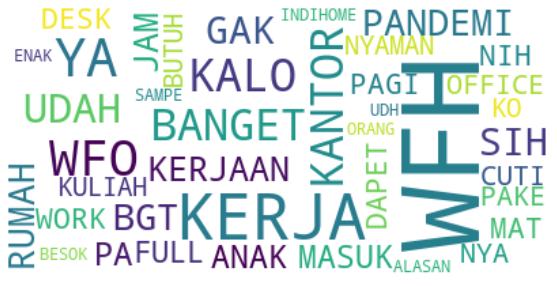

In [ ]:
# Positif in Indonesian
cloud(positif['Tweet_In'])

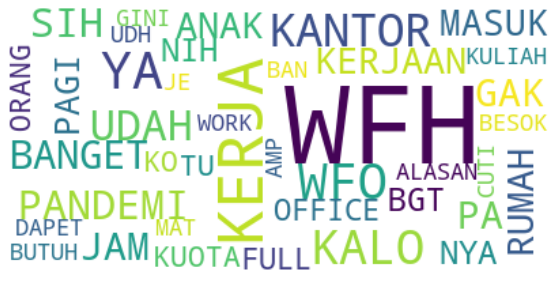

In [ ]:
# Netral in Indonesian
cloud(netral['Tweet_In'])

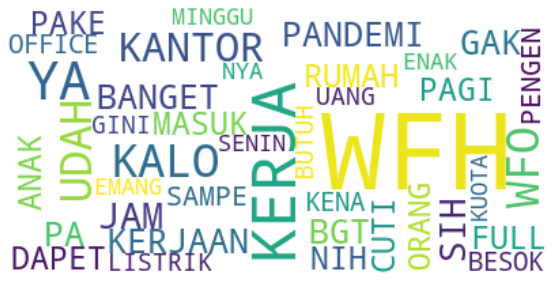

In [ ]:
# Negatif in Indonesian
cloud(negatif['Tweet_In'])

# TOPIC MODELING

Using for taking deeper analysis about what is the most topic on those sentiment.